<a href="https://colab.research.google.com/github/essiesalari/Titanic-ML/blob/main/TitanicML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic ML Project**




## Import Libraries and Dataset





In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Clone the GitHub repository
!git clone https://github.com/essiesalari/Titanic-ML.git

%cd Titanic-ML
%cd dataset
!unzip titanic.zip

In [10]:
# Read data into Pandas DataFrame
df_gen_sub = pd.read_csv('gender_submission.csv')
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## EDA

In [16]:
# Dataset shape
print(df_gen_sub.shape, df_test.shape, df_train.shape)

(418, 2) (418, 11) (891, 12)


In [21]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [103]:
# Check for missing values
print("train nulls")
print(df_train.isnull().sum())
print("\ntest nulls")
print(df_test.isnull().sum())

train nulls
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         0
dtype: int64

test nulls
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Cabin           0
Embarked        0
dtype: int64


### Dsitributions

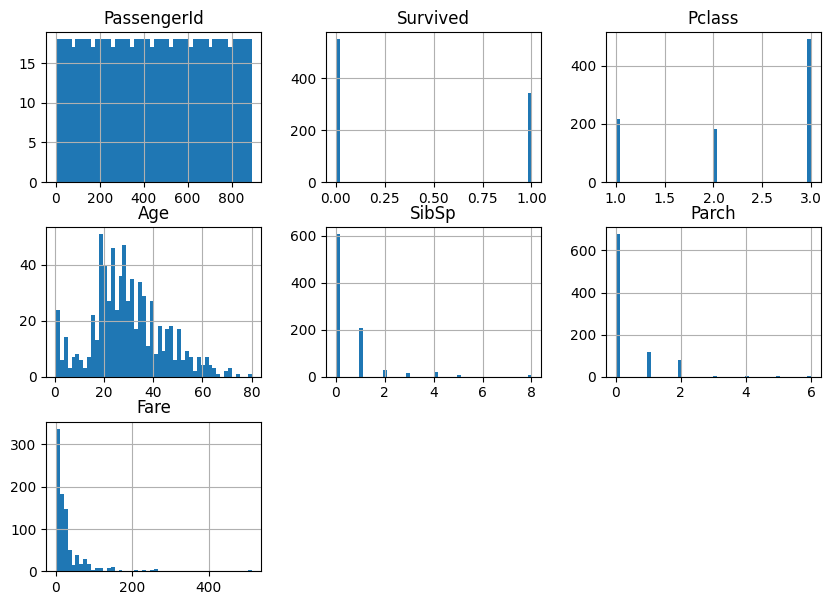

In [29]:
# Vusualize distributions
df_train.hist(bins=50, figsize=(10,7))
plt.show()

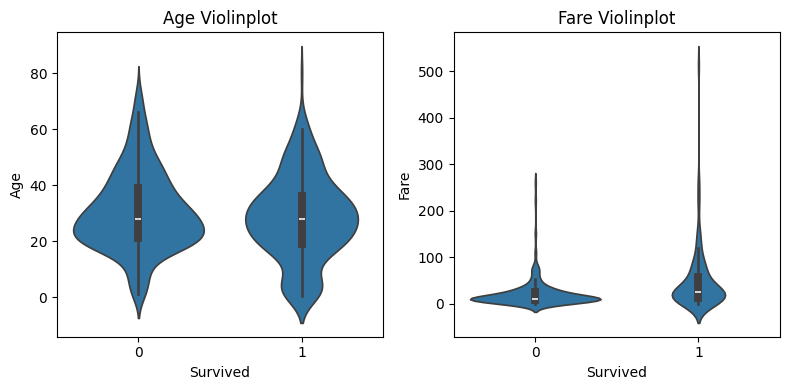

In [50]:
fig, axes =plt.subplots(1, 2, figsize=(8, 4))

sns.violinplot(x='Survived', y='Age', data=df_train, ax=axes[0])
axes[0].set_title('Age Violinplot')

sns.violinplot(x='Survived', y='Fare', data=df_train, ax=axes[1])
axes[1].set_title('Fare Violinplot')

plt.tight_layout()
plt.show()

### Correlations

<ipython-input-31-a79f54ebe822>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr()


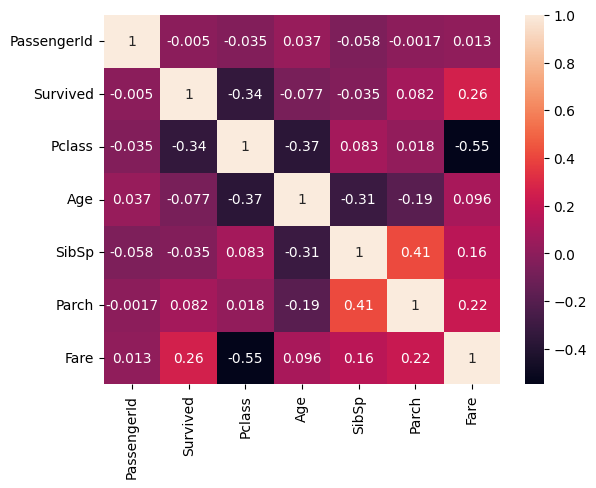

In [31]:
# Vusualize the correlations
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [45]:
# Pclass and Fare correlation _ statistical analysis
from scipy.stats import pearsonr

corr, p_value = pearsonr(df_train['Pclass'], df_train['Fare'])
print(f'Pearson Correlation Coeff. Fare&Pclass: {corr}')
print(f'p_value Fare&Pclass: {p_value}')

Pearson Correlation Coeff. Fare&Pclass: -0.5494996199439078
p_value Fare&Pclass: 1.967386173422602e-71


### Survival Rates

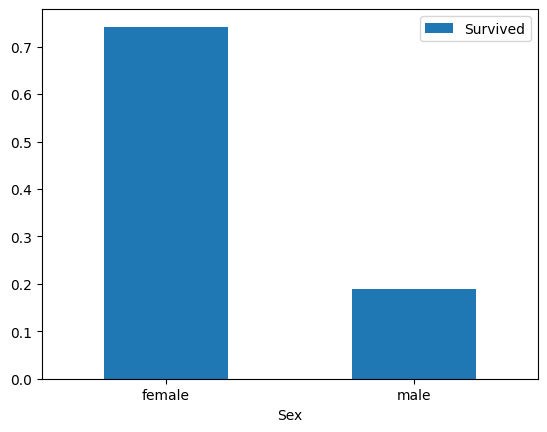

In [68]:
# Explore survival rates
## Explore survival rates by sex
df_train.groupby('Sex')[['Survived']].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show();

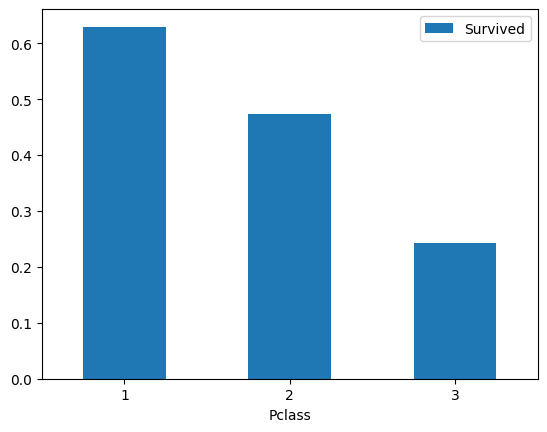

In [63]:
## Explore survival rates by class
df_train.groupby('Pclass')[['Survived']].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show();

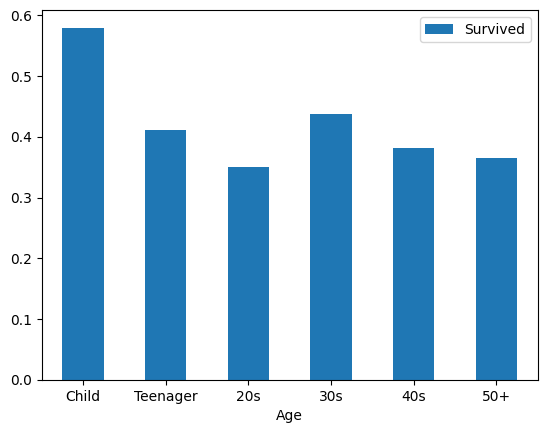

In [64]:
## Explore survival rates by age
bins = [0, 12, 19, 29, 39, 49, np.inf]
labels = ['Child', 'Teenager', '20s', '30s', '40s', '50+']
df_train.groupby(pd.cut(df_train['Age'], bins=bins, labels=labels))[['Survived']].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show();

In [75]:
# Chi_Square statistical test for Age means
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_train['Survived'], pd.cut(df_train['Age'], bins=bins, labels=labels))
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'Chi_Square statistic: {chi2}')
print(f'p_value: {p_value}')

Chi_Square statistic: 12.902914802478813
p_value: 0.024305747751816542


## Missing Values Handeling

In [ ]:
# Drop useless columns in ML
df_train = df_train.drop(['Name', 'Ticket'], axis=1)
df_test = df_test.drop(['Name', 'Ticket'], axis=1)

# Encoding categorical feilds
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['Sex', 'Cabin', 'Embarked']
for column in columns_to_encode:
    le = LabelEncoder()
    le.fit(pd.concat([df_train[column], df_test[column]]))
    df_train[column] = le.transform(df_train[column])
    df_test[column] = le.transform(df_test[column])

In [ ]:
# Ru IterativeImputer method
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=15, random_state=42)

df_train_dropped = df_train.drop(['Survived'], axis=1) # Drop the Survived column from df_train before imputation

df_imputed_train = imp.fit_transform(df_train_dropped)
df_imputed_test = imp.transform(df_test)

df_imputed_train = pd.DataFrame(df_imputed_train, columns=df_train_dropped.columns)
df_imputed_test = pd.DataFrame(df_imputed_test, columns=df_test.columns)

df_imputed_train = pd.concat([df_imputed_train, df_train['Survived']], axis=1) # Concatenate the Survived column back to df_imputed_train